# Decision Tree Regresion: estimar el rating de un jugador

¿como funciona el algoritmo de Decision Tree Regresion?

VIDEO: https://www.youtube.com/watch?v=UhY5vPfQIrA&ab_channel=NormalizedNerd

# Explorar datos

In [10]:
import pandas as pd

soccer_frame = pd.read_csv('../datasets/soccer.csv')

print(soccer_frame.shape)
print(soccer_frame.info())
print('-'*30)
print('NUMERO DE VALORES NULOS POR COLUMNA')
print('-'*30)
print(soccer_frame.isna().sum())

(8847, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8847 non-null   int64  
 1   name         8847 non-null   object 
 2   rating       8847 non-null   int64  
 3   position     8847 non-null   object 
 4   height       8847 non-null   int64  
 5   foot         8847 non-null   object 
 6   rare         8847 non-null   int64  
 7   pace         7917 non-null   float64
 8   shooting     7917 non-null   float64
 9   passing      7917 non-null   float64
 10  dribbling    7917 non-null   float64
 11  defending    7917 non-null   float64
 12  heading      7917 non-null   float64
 13  diving       930 non-null    float64
 14  handling     930 non-null    float64
 15  kicking      930 non-null    float64
 16  reflexes     930 non-null    float64
 17  speed        930 non-null    float64
 18  positioning  930 non-null    float64


# Limpieza de datos

vemos que las columnas desde `diving` hasta `positioning` tienen muchos valores nulos, aunque seria interesante ver como afectan estos features en la prediccion de otra variable objetivo o en la categorizacion de un jugador, no hay datos suficientes para hacerlo, o se podria hacer un modelo con solo los datos que tienen estos valores. intenta hacerlo 

por ahora, nos quedamos con el resto de variables y quitamos las 930 filas que tienen valores nulo en las columnas restantes

In [11]:
soccer_frame = soccer_frame.loc[:,'id':'heading'] #slicing de las columnas de interes
soccer_frame = soccer_frame.dropna(axis=0) #quitar valores nulos de otras columnas en las todas las filas
print(soccer_frame.shape)
print(soccer_frame.isna().sum())

print('\ntrabajaremos con un dataframe del siguiente numero de registros y features:')
soccer_frame.shape

(7917, 13)
id           0
name         0
rating       0
position     0
height       0
foot         0
rare         0
pace         0
shooting     0
passing      0
dribbling    0
defending    0
heading      0
dtype: int64

trabajaremos con un dataframe del siguiente numero de registros y features:


(7917, 13)

# Dividir datos entrenamiento y datos de prueba del modelo

para evitar cualquier sesgo de la recoleccion de las observaciones y con el fin de tener valores variados en todos los features para ambos conjuntos de datos, vamos a hacer shuffle de las filas y luego escoger 20 filas para que sean el dataset de prueba del modelo, el resto de valores seran parte del dataset de entrenamiento

In [12]:
#desordenar el dataframe
#frac= 1 significa que haremos un shuffle en el 100% de los datos
# random state = 2 es el codigo de reproductibilidad de esta operacion 
soccer_frame = soccer_frame.sample(frac=1, random_state=2).reset_index(drop=True) 
print('dataframe shuffled')

dataframe shuffled


In [13]:
sample = soccer_frame[:20] # tomamos los primeros 20 datos
print(sample.shape)
#arreglo de valores esperados para comparar con los valores de la prediccion de rating
sample_rating = pd.Series(sample['rating']) 

(20, 13)


In [14]:
training = soccer_frame[20:] # el resro de registros se usan para entrenamiento
print(training.shape)

(7897, 13)


# definir el objetivo y tipo del modelo 

Nos interesa estimar el rating de un jugador, basado en otros parametros cuantitativos que lo describen, por tanto un metodo de regression o estimacion es ideal

### Prediction target

In [15]:
y1 = training['rating'] # vector de valores correctos de rating, 'LABELS'

### Seleccion de Features

podemos ver que `position` y `foot` son variables categoricas pero no reflejan una caracteristica que defina que tan bueno es un jugador, los mejores jugadores del mundo son delanteros pero hay muchos defensores y porteros con ratings muy altos tambien. El pie es una variable sesgada a los diestros pues estadisticamente son más. 

tambien descartamos las columnas de nombre y id pues no tienen relacion a el rating de un jugador

el resto de variables numericas si definen en cierta manera las habilidades de un jugador

In [16]:
features_1 = ['height', 'rare', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading']

X1 = training[features_1] # registros con vectores de entranimiento

X1.describe()

,height,rare,pace,shooting,passing,dribbling,defending,heading
count,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000
mean,180.989363,0.353932,67.924782,0.550370,58.837787,61.184627,60.338863,63.737495
std,6.201193,0.478219,11.171622,0.131343,10.962571,12.253821,10.625327,8.985895
min,158.000000,0.000000,24.000000,0.120000,13.000000,19.000000,26.000000,22.000000
25%,177.000000,0.000000,62.000000,0.470000,52.000000,54.000000,52.000000,58.000000
50%,181.000000,0.000000,69.000000,0.570000,60.000000,63.000000,61.000000,64.000000
75%,185.000000,1.000000,75.000000,0.650000,66.000000,70.000000,68.000000,70.000000
max,203.000000,1.000000,96.000000,0.900000,92.000000,97.000000,89.000000,91.000000


## Construir el modelo

In [17]:
from sklearn.tree import DecisionTreeRegressor as DTR

rating_predictor_model = DTR(random_state=1)# reproductibilidad: 1
rating_predictor_model.fit(X1,y1)
print('Modelo Entrenado !!')

Modelo Entrenado !!


### Run the Model

In [18]:
print('Making predictions for the following 20 players')
print(sample[features_1])

Making predictions for the following 20 players
    height  rare  pace  shooting  passing  dribbling  defending  heading
0      178     0  59.0      0.68     73.0       64.0       63.0     63.0
1      179     1  68.0      0.63     47.0       62.0       46.0     65.0
2      186     1  56.0      0.76     62.0       69.0       58.0     74.0
3      188     1  75.0      0.58     45.0       45.0       76.0     81.0
4      175     0  70.0      0.56     69.0       70.0       69.0     66.0
5      175     0  74.0      0.49     69.0       63.0       58.0     63.0
6      176     1  81.0      0.69     59.0       70.0       49.0     64.0
7      191     0  79.0      0.75     78.0       73.0       74.0     69.0
8      182     0  73.0      0.49     66.0       57.0       72.0     64.0
9      180     0  75.0      0.65     62.0       69.0       46.0     55.0
10     182     0  66.0      0.50     66.0       64.0       69.0     63.0
11     184     0  70.0      0.65     46.0       65.0       52.0     73.0
12 

In [19]:
print('The predictions of the ratings are: ')
predicted_ratings = pd.Series(rating_predictor_model.predict(sample[features_1]))
print(predicted_ratings)

The predictions of the ratings are: 
0     66.0
1     61.0
2     64.0
3     71.0
4     73.0
5     69.0
6     71.0
7     75.0
8     71.0
9     65.0
10    70.0
11    66.0
12    72.0
13    61.0
14    74.0
15    72.0
16    70.0
17    82.0
18    59.0
19    82.0
dtype: float64


### validate de model

In [21]:
results = {'real_rating': sample_rating, 'predicted_rating':predicted_ratings}
results_frame = pd.DataFrame(results)

results_frame['difference'] = abs(results_frame['real_rating'] - results_frame['predicted_rating'])

print(results_frame)

    real_rating  predicted_rating  difference
0            70              66.0         4.0
1            63              61.0         2.0
2            74              64.0        10.0
3            69              71.0         2.0
4            71              73.0         2.0
5            68              69.0         1.0
6            72              71.0         1.0
7            76              75.0         1.0
8            68              71.0         3.0
9            66              65.0         1.0
10           68              70.0         2.0
11           70              66.0         4.0
12           74              72.0         2.0
13           62              61.0         1.0
14           79              74.0         5.0
15           71              72.0         1.0
16           72              70.0         2.0
17           78              82.0         4.0
18           65              59.0         6.0
19           86              82.0         4.0


### mean absolute error

error = real - predicted

absolute error = |real - predicted|

MAE = mean absolute error = sum(absolute errors) / total number of observations

In [31]:
number_observations = sample_rating.shape[0] # numero de filas en el sample dataset
mae = results_frame['difference'].sum() / number_observations
print('Mean absolute error for the model:', mae)

#o equivalentemente
print('average difference:', results_frame['difference'].mean())

print('podemos ver que el MAE, intuitivamente se define como la diferencia promedio entre el valor real y el estimado')

Mean absolute error for the model: 2.9
average difference: 2.9
podemos ver que el MAE, intuitivamente se define como la diferencia promedio entre el valor real y el estimado


Usando la lirberia de metricas para hallar esta metrica: 

<<  On average the model predictions are off by about >>

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(sample_rating, predicted_ratings)

2.9

### Reproductibilidad del modelo

el modelo anterior usa un conjunto de datos de prueba y sample distintos cada vez que se ejecuta, para garantizar la reproductibilidad del modelo se debe usar siempre el mismo conjunto de datos de entrenamiento y el mismo conjunto de datos de validacion. esto se soluciona haciendo lo que hicimos anteriormente, usando variables de reporductivilidad para los splits o separando en dos archivos ambos conjuntos, lo cual puede ser tedioso, usaremos entonces el modulo `train_test_split` de sklearn


In [24]:
from sklearn.model_selection import train_test_split

#definir valores target 
y1 = soccer_frame['rating']

# define features values
X1 = soccer_frame[features_1]

#definir variables de reproductibilidad
random_state_model = 1
random_state_shuffle = 1

#split data into trainning and validation data
train_X1, val_X1, train_y1, val_y1 = train_test_split(X1, y1, random_state=random_state_shuffle, test_size= 0.01)

# definir tipo de modelo y parametros
rating_predictor_model = DTR(random_state=random_state_model)
# entrenar modelo con datos de prueba: features -> target values
rating_predictor_model.fit(train_X1, train_y1)

#arreglo de valores estimados
predicted_ratings = rating_predictor_model.predict(val_X1)

#medir MAE del modelo
print(mean_absolute_error(val_y1, predicted_ratings))

1.7625


### encontrar la mejor version del modelo

<img src='http://i.imgur.com/AXSEOfI.png' width='500' >

se busca minimizar el MAE y evitar el underfitting(muy general que no sirve para predecir nueva data o encontrar relaciones ocultas) o el overfittig (que es muy especifico y solo funciona con datos parecidos al conjunto de entrenamiento)

Models can suffer from either:

- Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.


se busca un SWEET SPOT, que hace un balance entre la generealidad y la especificidad y minimiza el MAE

para lograrlo se pude jugar modificando diferentes parametros, como el maximo numero de hojas del arbol de decision, el tamaño de los datos de validacion y prueba o modificando el random_state el cual define como se hace el shufle de los datos

por ahora solo jugemos con el maximo numero de hojas, las que predicen el valor del raiting para una combinacion de valores en los features:

In [25]:

def get_mae(max_leafs:int, train_X, val_X, train_y, val_y):
    model = DTR(max_leaf_nodes=max_leafs, random_state=random_state_model)
    model.fit(train_X, train_y)
    predicted_values = model.predict(val_X)
    return mean_absolute_error(val_y, predicted_values)

Ahora debemos buscar en que rango de valores de el maximo numero de hojas esta el tan buscado SWEET SPOT

In [26]:
for leafs in [5, 50, 500, 5000, 10000]:
    actual_mae = get_mae(leafs ,train_X1, val_X1, train_y1, val_y1)
    print('Max leaf nodes:', leafs, ' - MAE:', actual_mae)

Max leaf nodes: 5  - MAE: 3.5443961886117976
Max leaf nodes: 50  - MAE: 1.9736498386875496
Max leaf nodes: 500  - MAE: 1.680049589197297
Max leaf nodes: 5000  - MAE: 1.85
Max leaf nodes: 10000  - MAE: 1.85


podemos ver que el menor MAE esta entre 50 y 5000, aun podemos hacer mas narrowing, rodenando el 500 

In [27]:
for leafs in range(100, 3000, 200):
    actual_mae = get_mae(leafs ,train_X1, val_X1, train_y1, val_y1)
    print('Max leaf nodes:', leafs, ' - MAE:', actual_mae)

Max leaf nodes: 100  - MAE: 1.9340654698101
Max leaf nodes: 300  - MAE: 1.7520532935891402
Max leaf nodes: 500  - MAE: 1.680049589197297
Max leaf nodes: 700  - MAE: 1.6686741537092473
Max leaf nodes: 900  - MAE: 1.8010550926359907
Max leaf nodes: 1100  - MAE: 1.7941083700763454
Max leaf nodes: 1300  - MAE: 1.7930532492103697
Max leaf nodes: 1500  - MAE: 1.771023508118129
Max leaf nodes: 1700  - MAE: 1.7945922164565737
Max leaf nodes: 1900  - MAE: 1.7858644450449794
Max leaf nodes: 2100  - MAE: 1.76130843598481
Max leaf nodes: 2300  - MAE: 1.7348463760504202
Max leaf nodes: 2500  - MAE: 1.7447653908591405
Max leaf nodes: 2700  - MAE: 1.7626910069097566
Max leaf nodes: 2900  - MAE: 1.8060497141747138


podemos ver que los menores valores de MAE empiezan a ubicarse entre `leafs`=100  y `leafs`=900, ahora podemos buscar el numero de hojas exacto que da el menor MAE para esta instancia del modelo 

In [28]:
best_number_leafs=1450
min_mae = 10**10
for leafs in range(100,901):
    actual_mae = get_mae(leafs ,train_X1, val_X1, train_y1, val_y1)
    if actual_mae < min_mae :
        min_mae = actual_mae
        best_number_leafs = leafs

print('best number of leafs: ', best_number_leafs)

best number of leafs:  543


ya que se conoce el mejor tamaño para el arbol de decision, se usa ese valor para crear un modelo con todos los datos de entrada como datos de entrenamiento

### visualizar el Arbol


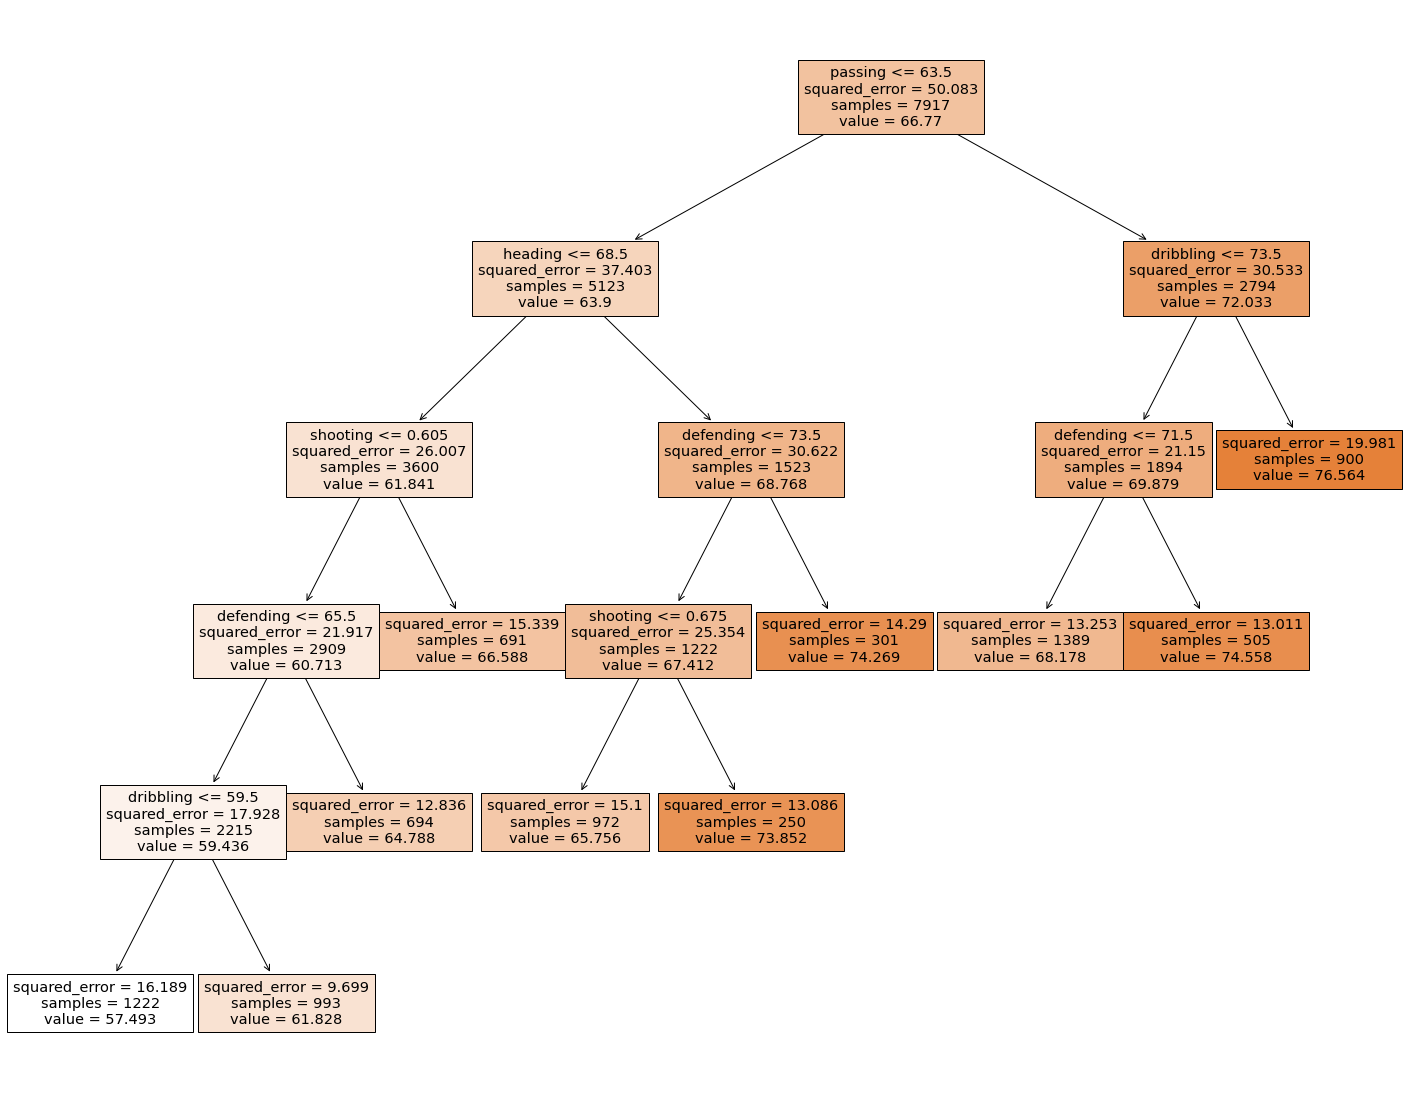

In [29]:
#es facil graficar cuando el arbol tiene pocos nodos y hojas

final_rating_predictor_model = DTR(max_leaf_nodes=10, random_state=1)
final_rating_predictor_model.fit(X1, y1)

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_rating_predictor_model,
                    feature_names=features_1,
                    filled=True)

# Random Forest

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters

In [30]:
features = ['height', 'rare', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading']

y = soccer_frame['rating']
X = soccer_frame[features]

random_state_model = 0
random_state_shuffle = 0
validation_size = 0.05

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = random_state_shuffle, test_size=validation_size)

from sklearn.ensemble import RandomForestRegressor as RFR

rating_forest_predictor = RFR(random_state=random_state_model)

rating_forest_predictor.fit(train_X, train_y)

predicted_ratings = rating_forest_predictor.predict(val_X)

mean_absolute_error(val_y, predicted_ratings)

1.5621212121212122

## Guardar la mejor version del modelo

para usar el modelo en una aplicacion real y para evitar tener que volver a correr el notebook para obtener la misma calidad el modelo, este se guarda en una forma pseudo binaria como un objeto del mismo tipo de origen(en este caso un modelo RFR de scikit-learn) 

In [1]:
import joblib

model_path = './modelos-guardados-joblibs/ml-RFR-regression-soccer-player-ratings.pkl'

## volver a correr la siguiente linea de codigo creara un nuevo archivo binario dejando registro inncesario en el repositorio
## 
##     joblib.dump(rating_forest_predictor, model_path)
##     print('Modelo guardado')


model_loaded = joblib.load(model_path)

print("Se ha cargado el modelo")
print(type(model_loaded))

Se ha cargado el modelo
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
